### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from matplotlib.lines import Line2D

### Importing the dataset

In [26]:
df = pd.read_csv('../../../Datasets/RQ1/less_metrics.csv')
df.head(10)

,Unnamed: 0,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,0,v1.0,2010-04-22,1271978111,1.2,0,1.0,1.0,269,260,5106
1,1,1.1.4-lastest,2011-11-14,1321287860,1.6,0,1.0,1.0,829,1008,7196
2,2,1.1.5-extend_patch,2011-12-14,1323818575,1.5,0,1.0,1.0,863,1032,7402
3,3,v1.3.0,2012-03-10,1331408187,1.6,0,1.0,1.0,1058,1286,8388
4,4,v1.3.1,2012-10-18,1350544225,1.6,0,1.0,1.0,1282,1556,9994
5,5,v1.3.2,2012-12-28,1356733810,1.7,0,1.0,1.0,2104,2276,13376
6,6,v1.3.3,2012-12-30,1356860149,1.7,0,1.0,1.0,2107,2281,13395
7,7,v1.4.0,2013-06-05,1370463467,1.6,0,1.0,1.0,2485,2680,15782
8,8,v1.4.0-b1,2013-03-08,1362730978,1.7,0,1.0,1.0,2494,2732,15660
9,9,v1.4.0-b2,2013-03-18,1363609434,1.7,0,1.0,1.0,2500,2727,15779


### Information of the Dataframe 

In [27]:
df.describe()

,Unnamed: 0,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
count,49.00000,4.900000e+01,49.000000,49.0,49.0,49.0,49.000000,49.000000,49.000000
mean,24.00000,1.471892e+09,1.202041,0.0,1.0,1.0,3077.122449,3461.387755,25560.428571
std,14.28869,1.040697e+08,0.443701,0.0,0.0,0.0,892.040933,1019.389601,12015.310635
min,0.00000,1.271978e+09,0.400000,0.0,1.0,1.0,269.000000,260.000000,5106.000000
25%,12.00000,1.388597e+09,0.600000,0.0,1.0,1.0,2979.000000,3362.000000,19007.000000
50%,24.00000,1.462671e+09,1.400000,0.0,1.0,1.0,3411.000000,3687.000000,23390.000000
75%,36.00000,1.566011e+09,1.500000,0.0,1.0,1.0,3592.000000,4041.000000,34352.000000
max,48.00000,1.694054e+09,1.700000,0.0,1.0,1.0,3910.000000,4490.000000,48752.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            49 non-null     int64  
 1   version               49 non-null     object 
 2   release_date          49 non-null     object 
 3   timestamp             49 non-null     int64  
 4   sqale_debt_ratio      49 non-null     float64
 5   vulnerabilities       49 non-null     int64  
 6   security_rating       49 non-null     float64
 7   sqale_rating          49 non-null     float64
 8   complexity            49 non-null     int64  
 9   cognitive_complexity  49 non-null     int64  
 10  ncloc                 49 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.3+ KB


### Updating Version Names

In [29]:
df['version'] = df['version'].str.replace('v', '')

In [30]:
df['version'] = 'v' + df['version']
df['version']

0                    v1.0
1          v1.1.4-lastest
2     v1.1.5-extend_patch
3                  v1.3.0
4                  v1.3.1
5                  v1.3.2
6                  v1.3.3
7                  v1.4.0
8               v1.4.0-b1
9               v1.4.0-b2
10              v1.4.0-b3
11              v1.4.0-b4
12                 v1.6.0
13                 v1.6.1
14                 v1.6.2
15                 v1.6.3
16                 v1.7.0
17                 v2.2.0
18                 v2.3.0
19                 v2.3.1
20                 v2.4.0
21                 v2.5.0
22                 v2.6.0
23                 v2.6.1
24                 v2.7.0
25                 v2.7.1
26                 v2.7.2
27                 v2.7.3
28         v3.0.0-alpha.3
29                 v3.0.0
30            v3.0.0-RC.1
31            v3.0.0-RC.2
32                 v3.0.1
33                 v3.0.3
34                v3.10.0
35           v3.10.0-beta
36         v3.10.0-beta.2
37                v3.10.1
38          

### Sorting accoriding to the timeframe

In [31]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [32]:
df.head(20)

,version,release_date,timestamp,sqale_debt_ratio,vulnerabilities,security_rating,sqale_rating,complexity,cognitive_complexity,ncloc
0,v1.0,2010-04-22,1271978111,1.2,0,1.0,1.0,269,260,5106
1,v1.1.4-lastest,2011-11-14,1321287860,1.6,0,1.0,1.0,829,1008,7196
2,v1.1.5-extend_patch,2011-12-14,1323818575,1.5,0,1.0,1.0,863,1032,7402
3,v1.3.0,2012-03-10,1331408187,1.6,0,1.0,1.0,1058,1286,8388
4,v1.3.1,2012-10-18,1350544225,1.6,0,1.0,1.0,1282,1556,9994
5,v1.3.2,2012-12-28,1356733810,1.7,0,1.0,1.0,2104,2276,13376
6,v1.3.3,2012-12-30,1356860149,1.7,0,1.0,1.0,2107,2281,13395
7,v1.4.0,2013-06-05,1370463467,1.6,0,1.0,1.0,2485,2680,15782
8,v1.4.0-b1,2013-03-08,1362730978,1.7,0,1.0,1.0,2494,2732,15660
9,v1.4.0-b2,2013-03-18,1363609434,1.7,0,1.0,1.0,2500,2727,15779


## Correlation

In [33]:
df_cor = df.drop(['version', 'release_date', 'timestamp','sqale_rating'], axis=1)

### Pearson Correlation

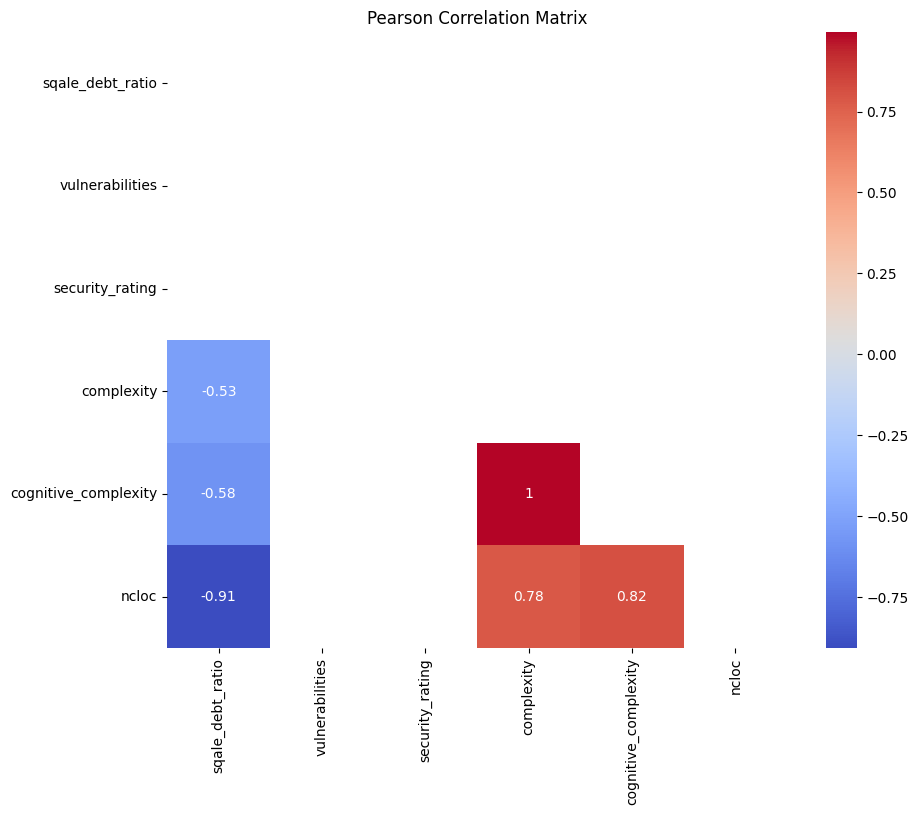

In [34]:
correlation_matrix = df_cor.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Pearson Correlation Matrix')
plt.show()

### Spearman Correlation

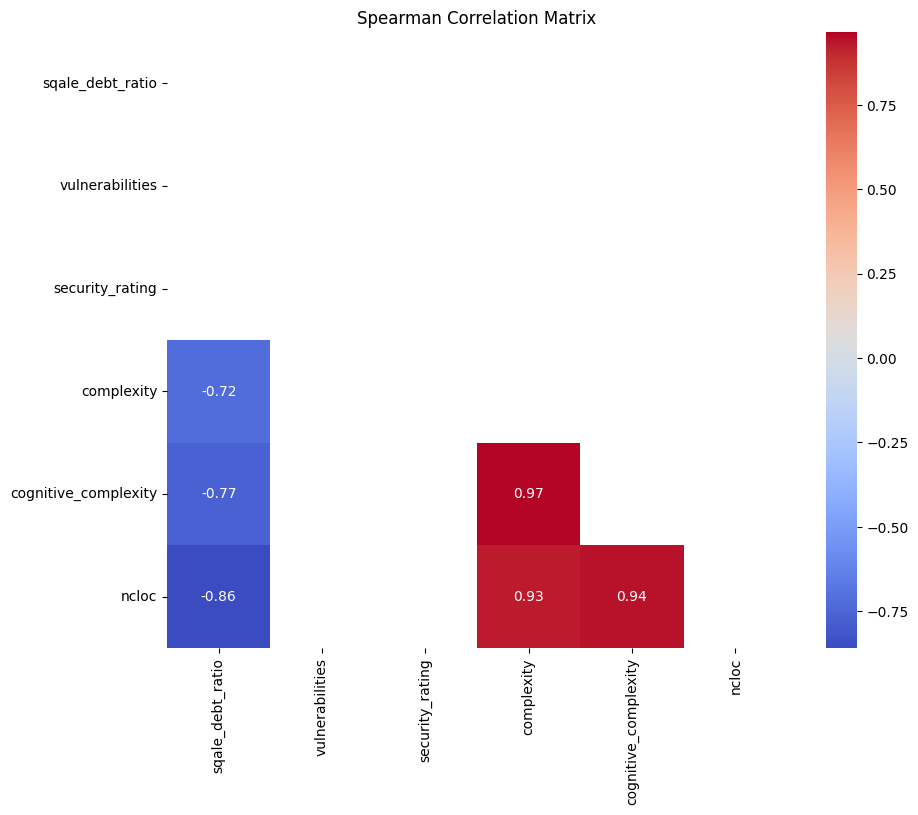

In [35]:
correlation_matrix = df_cor.corr(method ='spearman')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Spearman Correlation Matrix')
plt.show()

In [36]:
df['timestamp']

0     1271978111
1     1321287860
2     1323818575
3     1331408187
4     1350544225
5     1356733810
6     1356860149
7     1370463467
8     1362730978
9     1363609434
10    1367332592
11    1367648317
12    1388597379
13    1389527888
14    1391366219
15    1391878277
16    1393532188
17    1420372079
18    1422317926
19    1422466174
20    1423395709
21    1428051196
22    1454097313
23    1457109477
24    1462671307
25    1462826317
26    1483581478
27    1508812999
28    1507512840
29    1518326500
30    1517766519
31    1518310673
32    1518654505
33    1524088457
34    1566010830
35    1564855165
36    1565209926
37    1566092212
38    1566518786
39    1581285157
40    1581400396
41    1590976250
42    1591382657
43    1594653454
44    1610246345
45    1612065234
46    1633561081
47    1654716207
48    1694053956
Name: timestamp, dtype: int64

### Checking for the categorical and numerical columns

In [37]:
df_cor.columns

Index(['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'complexity',
       'cognitive_complexity', 'ncloc'],
      dtype='object')

In [38]:
columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating','complexity',
       'cognitive_complexity', 'ncloc']
for col in columns: 
    print(f'Count for {col}')   
    print(df[col].value_counts())
    print('------------------------')

Count for sqale_debt_ratio
sqale_debt_ratio
1.4    19
0.5     8
1.6     6
0.6     5
1.5     4
1.7     4
1.2     1
1.3     1
0.4     1
Name: count, dtype: int64
------------------------
Count for vulnerabilities
vulnerabilities
0    49
Name: count, dtype: int64
------------------------
Count for security_rating
security_rating
1.0    49
Name: count, dtype: int64
------------------------
Count for sqale_rating
sqale_rating
1.0    49
Name: count, dtype: int64
------------------------
Count for complexity
complexity
2485    3
3411    2
3591    2
3599    2
3889    2
269     1
3887    1
3603    1
3600    1
3592    1
3888    1
3907    1
3410    1
3898    1
3896    1
3910    1
3455    1
3482    1
3486    1
3494    1
3505    1
3407    1
3362    1
829     1
3356    1
863     1
1058    1
1282    1
2104    1
2107    1
2494    1
2500    1
2979    1
2991    1
3445    1
3446    1
3535    1
3055    1
3125    1
3138    1
3168    1
3288    1
3530    1
Name: count, dtype: int64
------------------------
C

### Categorical Columns Visulaization

C:\Users\Sadik Yasin\AppData\Local\Temp\ipykernel_18116\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\Sadik Yasin\AppData\Local\Temp\ipykernel_18116\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\Sadik Yasin\AppData\Local\Temp\ipykernel_18116\1301555775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
C:\Users\Sadik Yasin\AppData\Lo

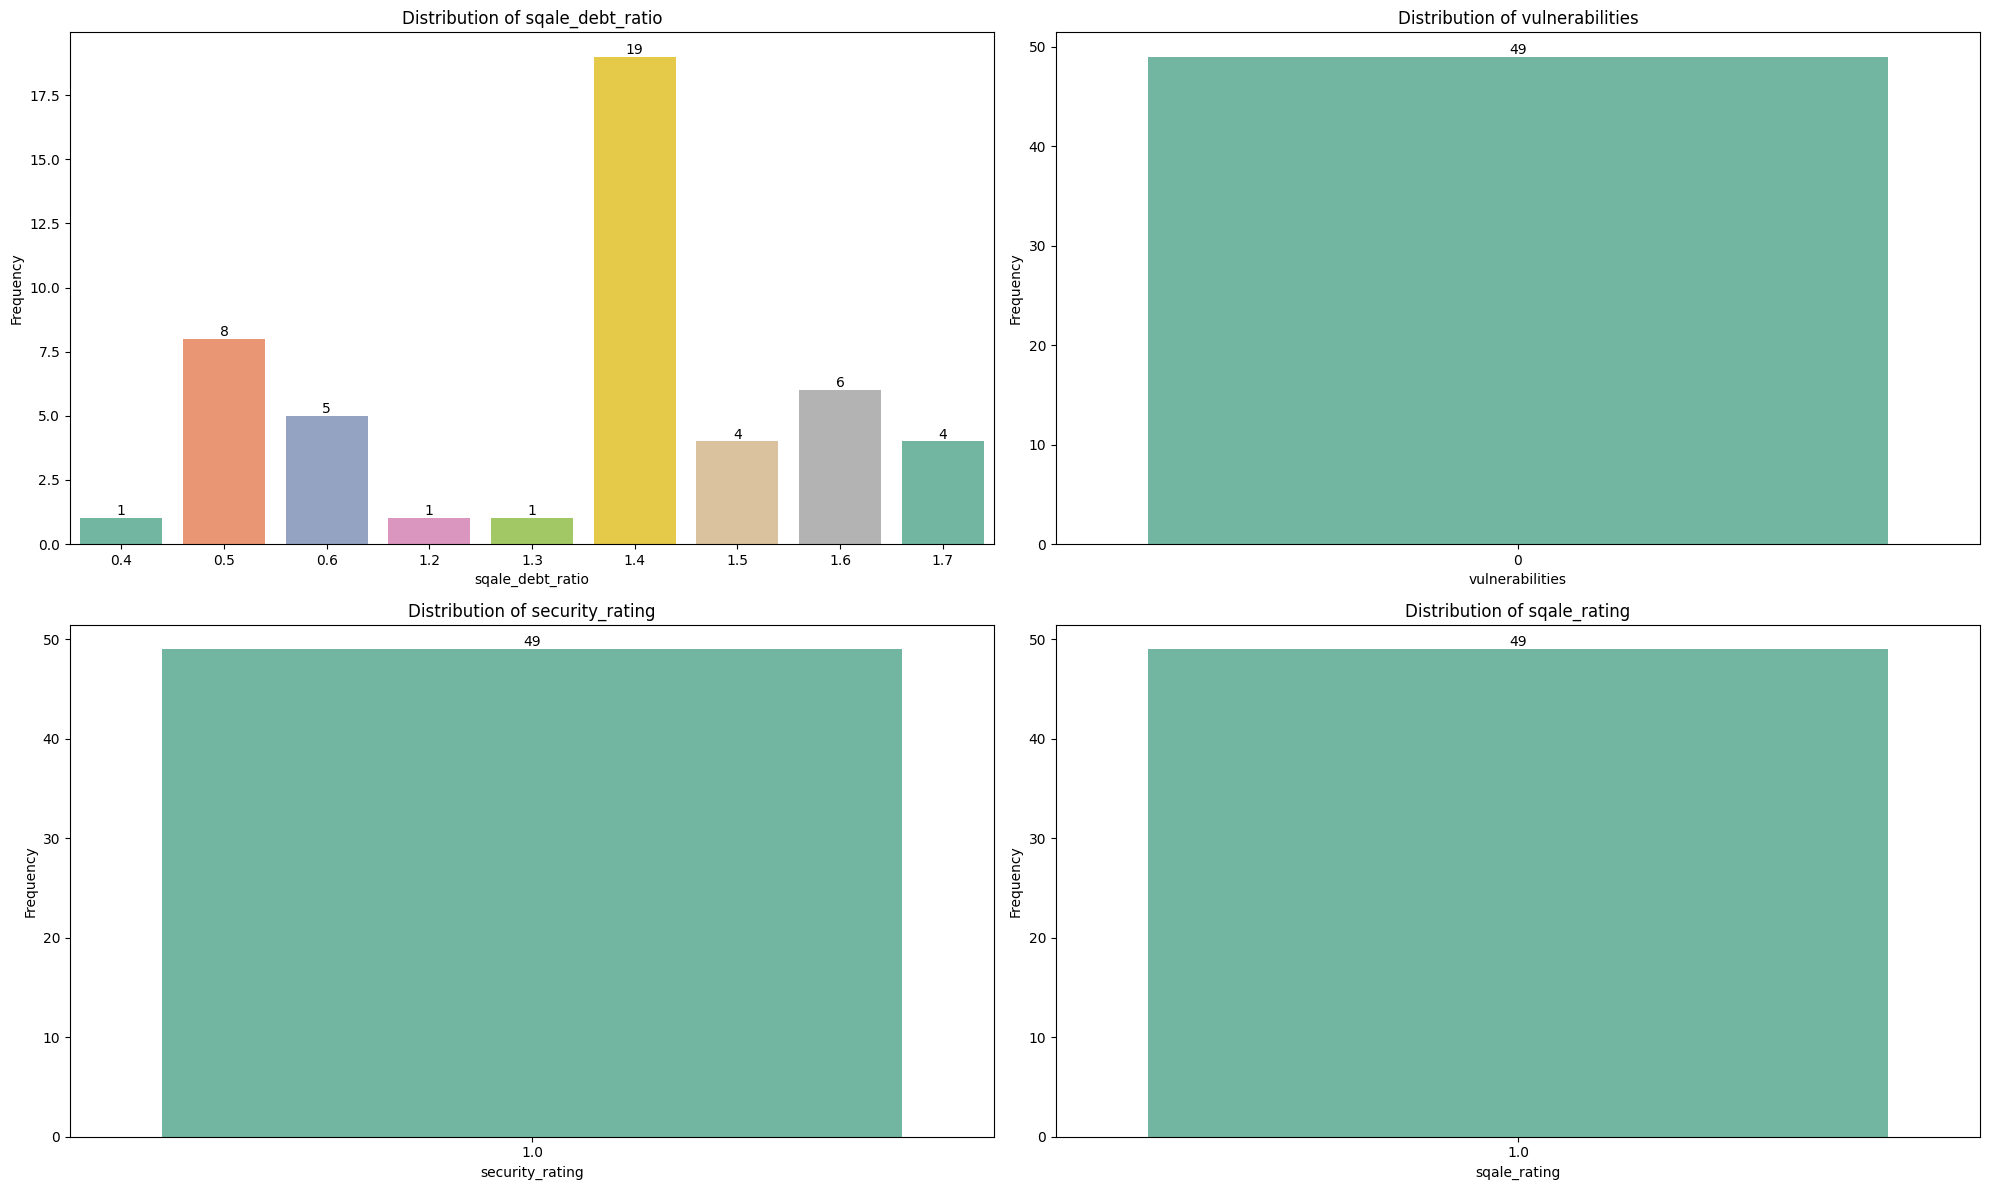

In [39]:
categorical_columns = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating']
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for ax, col in zip(axs.flatten(), categorical_columns):
    countplot = sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 5), 
                           textcoords = 'offset points')
plt.tight_layout()
plt.show()

### Numerical Columns Visualization

#### Using Histogram

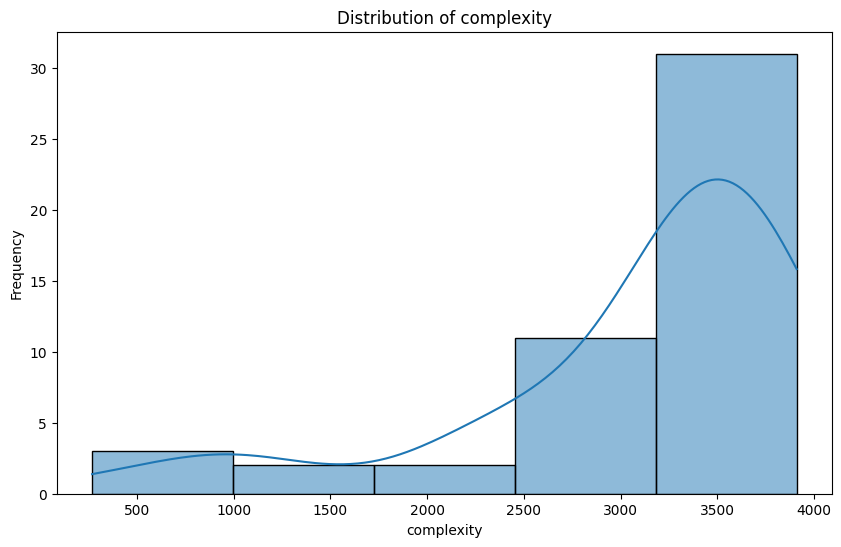

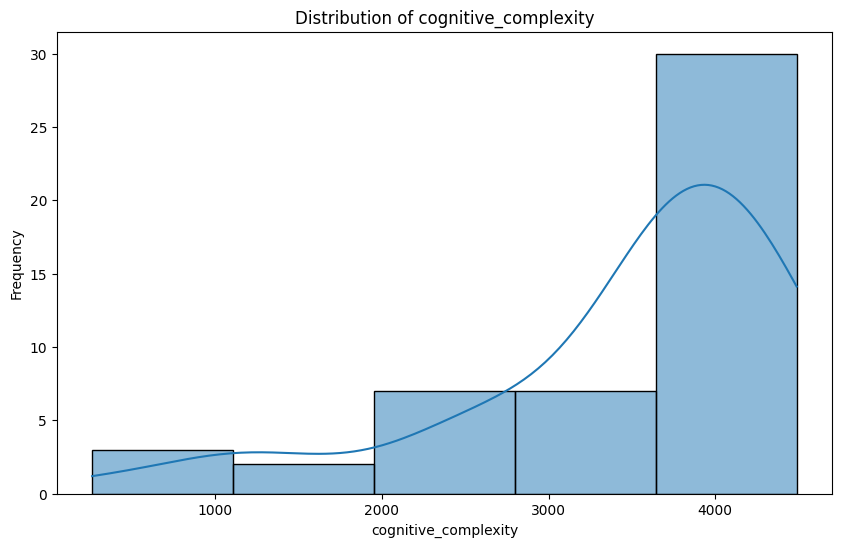

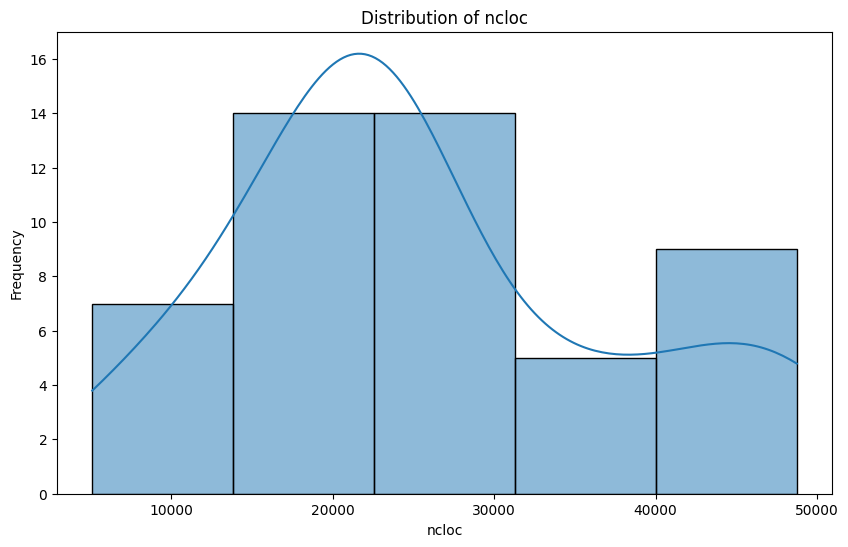

In [40]:
numerical_columns = ['complexity', 'cognitive_complexity', 'ncloc']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    histplot.set_ylabel('Frequency')
    plt.show()

#### Using Boxplot 

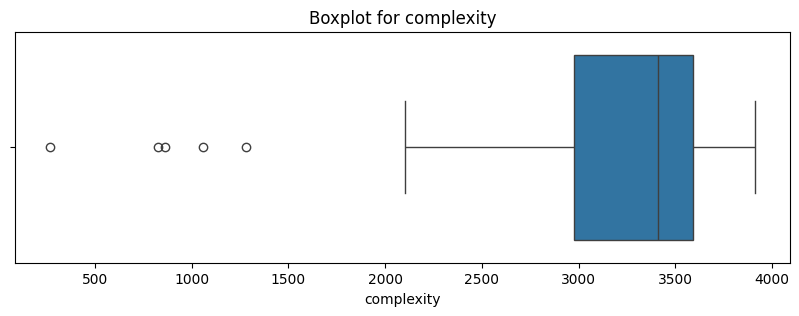

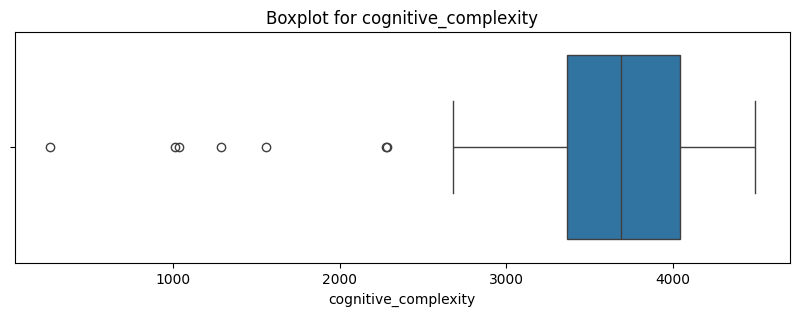

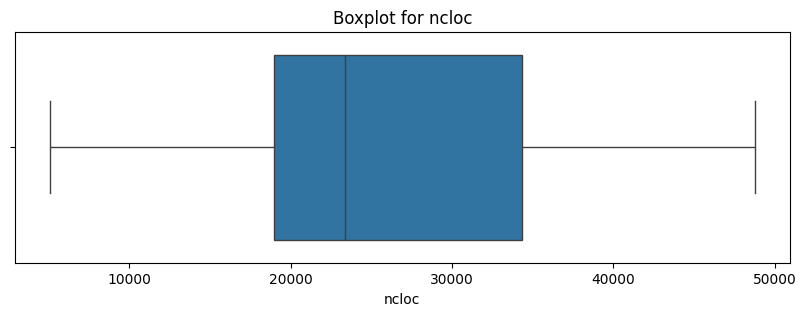

In [41]:
for col in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Visualization using Control Chart

In [42]:
columns_for_controlChart = ['sqale_debt_ratio', 'vulnerabilities', 'security_rating', 'sqale_rating', 'complexity', 'cognitive_complexity', 'ncloc']

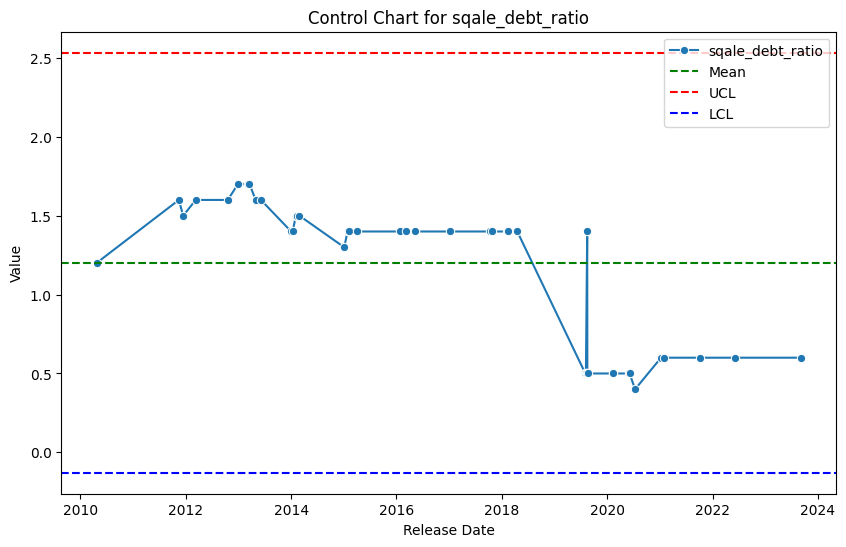

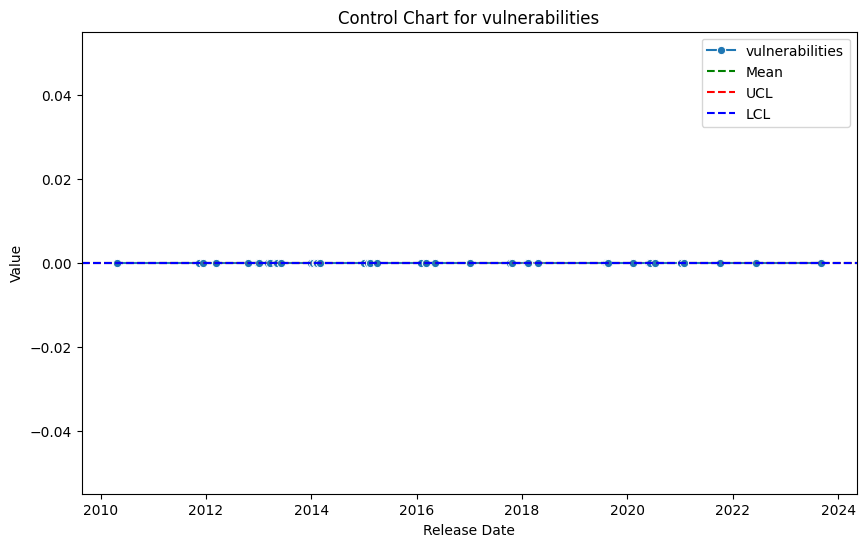

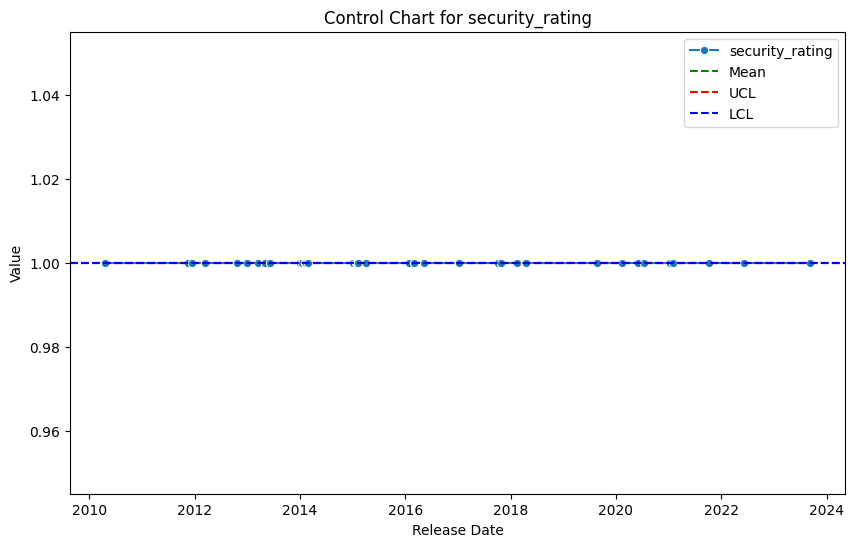

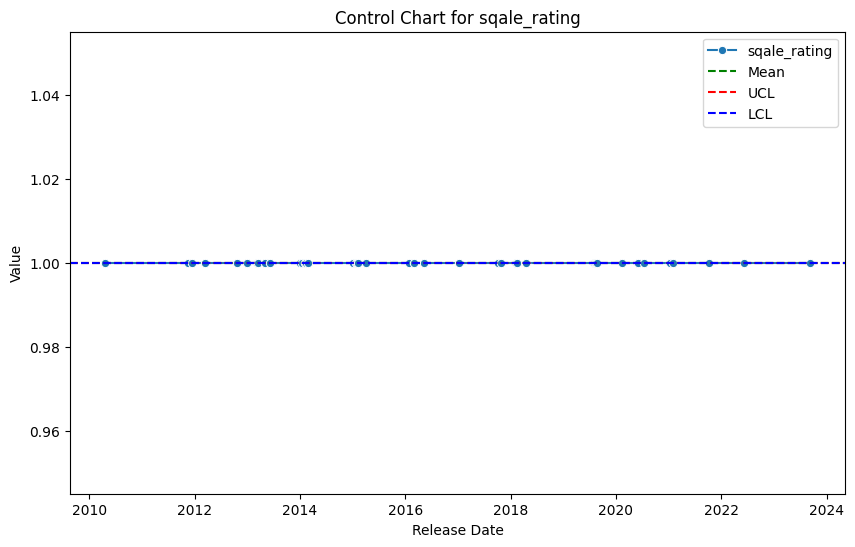

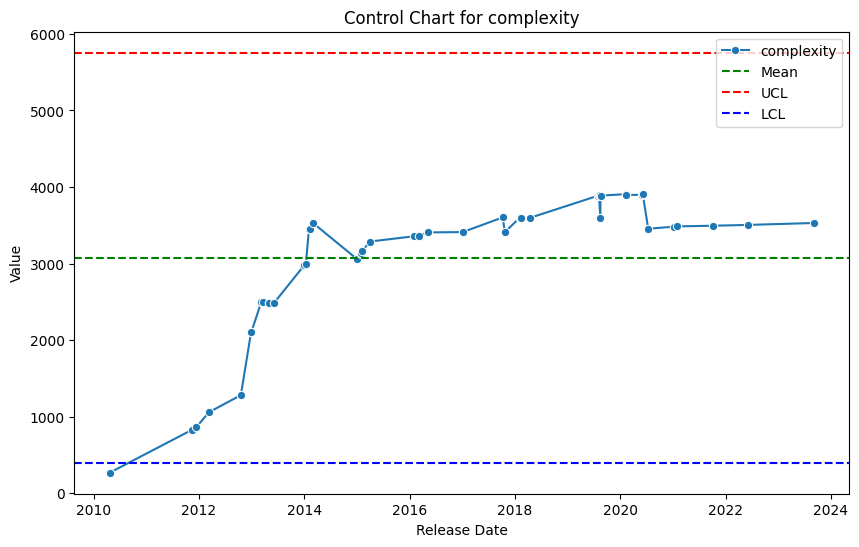

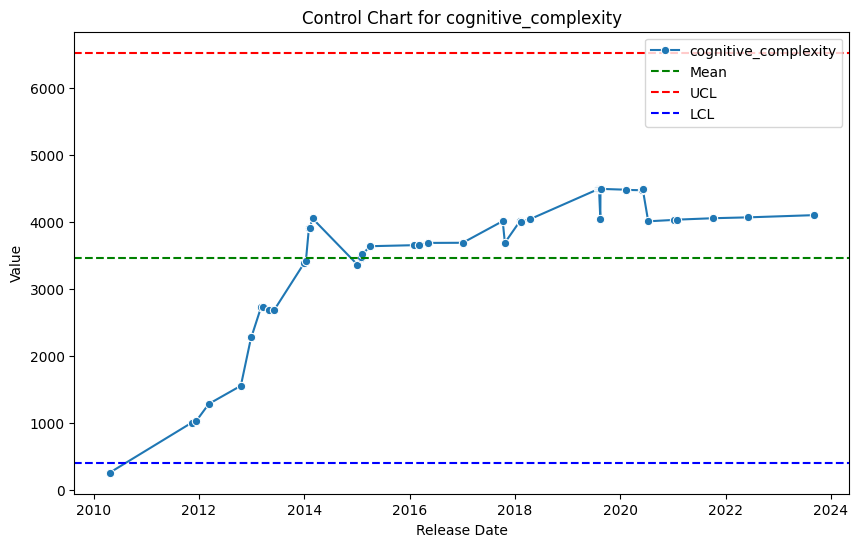

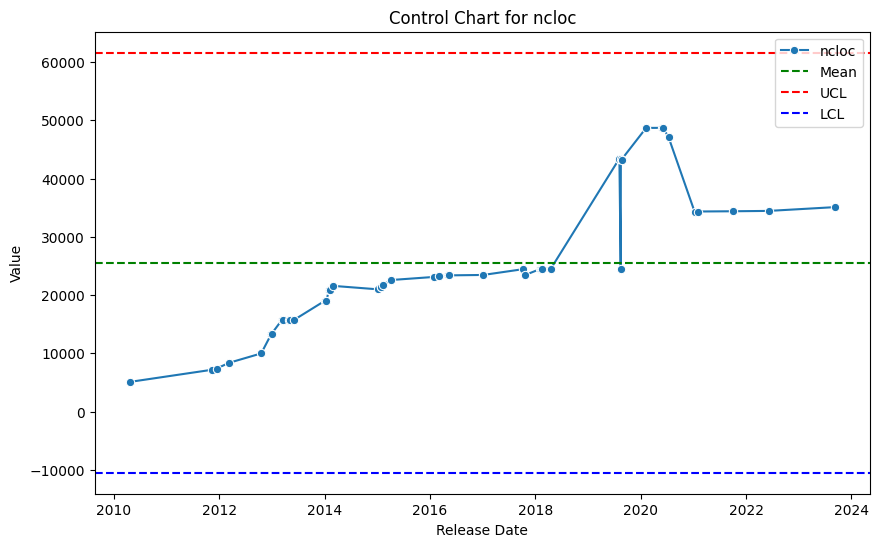

In [43]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Sort DataFrame by 'release_date'
df = df.sort_values('release_date')

for col in columns_for_controlChart:
    plt.figure(figsize=(10, 6))
    
    # Calculate mean and standard deviation
    mean = df[col].mean()
    std_dev = df[col].std()
    
    # Calculate control limits
    ucl = mean + 3*std_dev
    lcl = mean - 3*std_dev
    
    # Plot the data, mean, and control limits
    sns.lineplot(x=df['release_date'], y=df[col], label=col, marker='o')
    plt.axhline(mean, color='g', linestyle='--', label='Mean')
    plt.axhline(ucl, color='r', linestyle='--', label='UCL')
    plt.axhline(lcl, color='b', linestyle='--', label='LCL')
    
    plt.title(f'Control Chart for {col}')
    plt.ylabel('Value')
    plt.xlabel('Release Date')
    plt.legend()
    plt.show()

### Visualizing every column using Pairplot

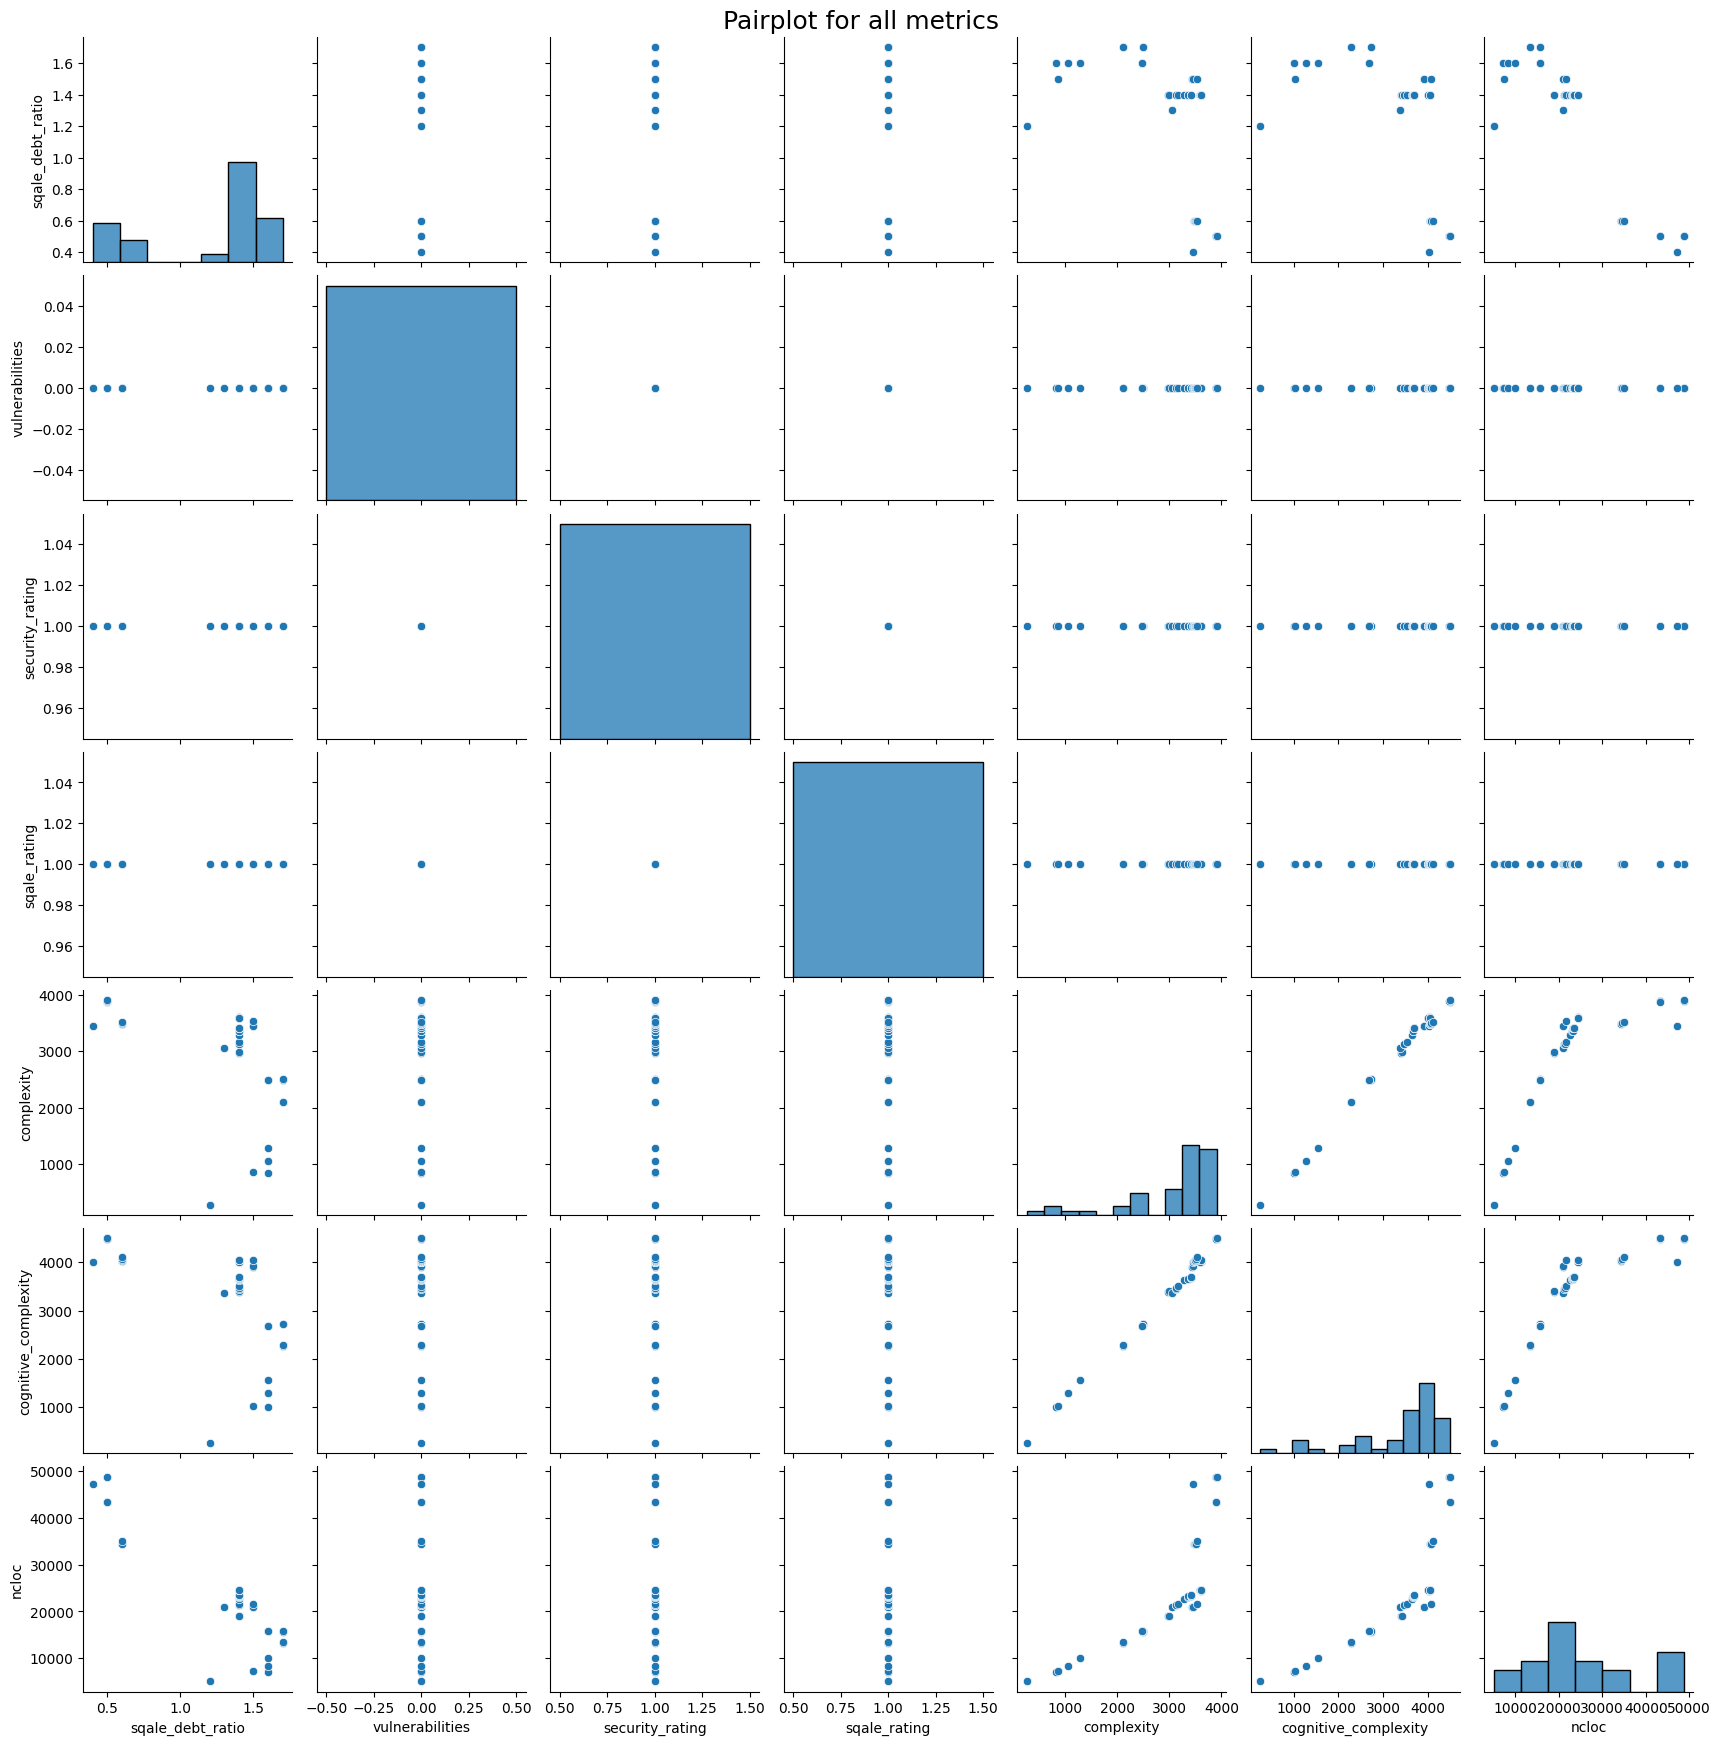

In [44]:
sns.pairplot(df[columns_for_controlChart])
plt.suptitle('Pairplot for all metrics', y=1., size=18)
plt.show()

### Visualization using Machine Learning Models

In [45]:
X = df[['ncloc']]
target_columns = ['complexity', 'cognitive_complexity', 'sqale_rating']

In [46]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'Support Vector': SVR(kernel='linear'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

Linear Regression Model for complexity:
Mean Squared Error: 178117.64067669513
R-squared: -2.9847444966127465

Decision Tree Model for complexity:
Mean Squared Error: 31104.85
R-squared: 0.3041403457592401

Random Forest Model for complexity:
Mean Squared Error: 23421.018969800007
R-squared: 0.4760385546854812

Gradient Boosting Model for complexity:
Mean Squared Error: 13843.23085512604
R-squared: 0.6903072724535555

Support Vector Model for complexity:
Mean Squared Error: 161507.49501571048
R-squared: -2.613151956653819

MLP Regressor Model for complexity:
Mean Squared Error: 1705343.4577911291
R-squared: -37.15095423704911

Linear Regression Model for cognitive_complexity:
Mean Squared Error: 181743.43775001142
R-squared: -1.4842877682787505

Decision Tree Model for cognitive_complexity:
Mean Squared Error: 64215.7
R-squared: 0.1222226231854816

Random Forest Model for cognitive_complexity:
Mean Squared Error: 44837.05116320003
R-squared: 0.38711328920914867

Gradient Boosting Model

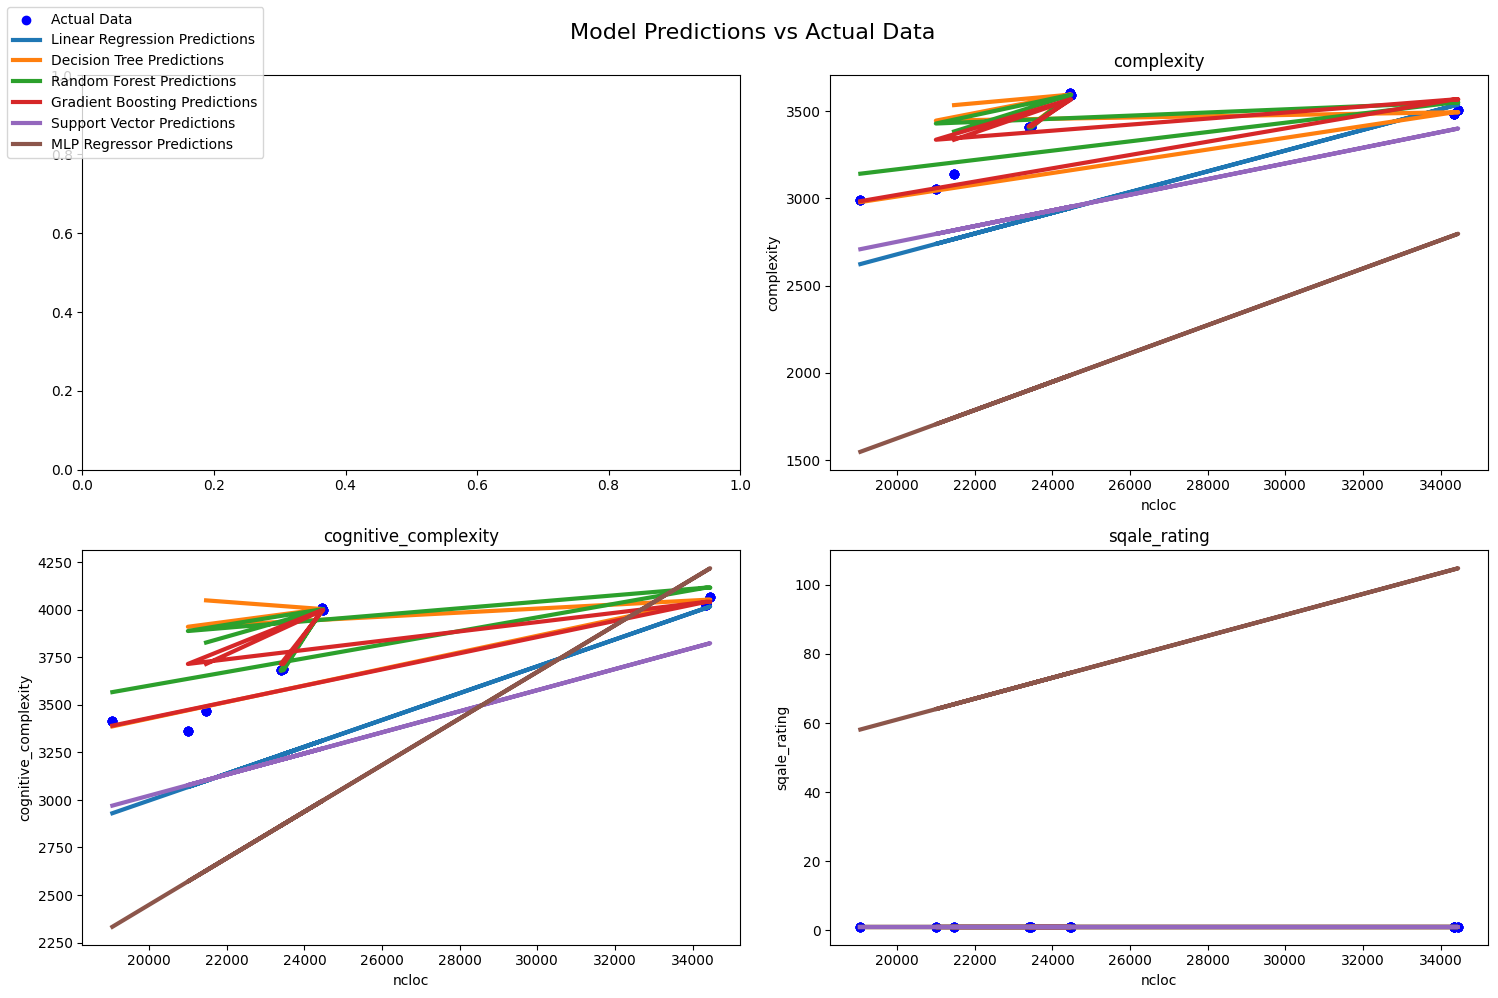

In [47]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a list to store handles for the legend
handles = []


# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate models
    results = {}
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3)

        # Set general name for the subplot
        axs[(i+1)//2, (i+1)%2].set_title(target_columns[i])

        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

        # Store handles for the legend
        if i == 0 and j == 0:
            handles.append(scatter)
        if i == 0:
            handles.extend(line)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Create a single legend for all subplots
labels = ['Actual Data'] + [name + ' Predictions' for name in models.keys()]
fig.legend(handles, labels, loc='upper left')

# Set a general title for the figure
fig.suptitle('Model Predictions vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()

Ensemble Model for complexity:
Mean Squared Error: 36890.44955155304
R-squared: 0.17470826994086452

Ensemble Model for cognitive_complexity:
Mean Squared Error: 50207.226306000455
R-squared: 0.31370728024433336

Ensemble Model for sqale_rating:
Mean Squared Error: 0.0
R-squared: 1.0



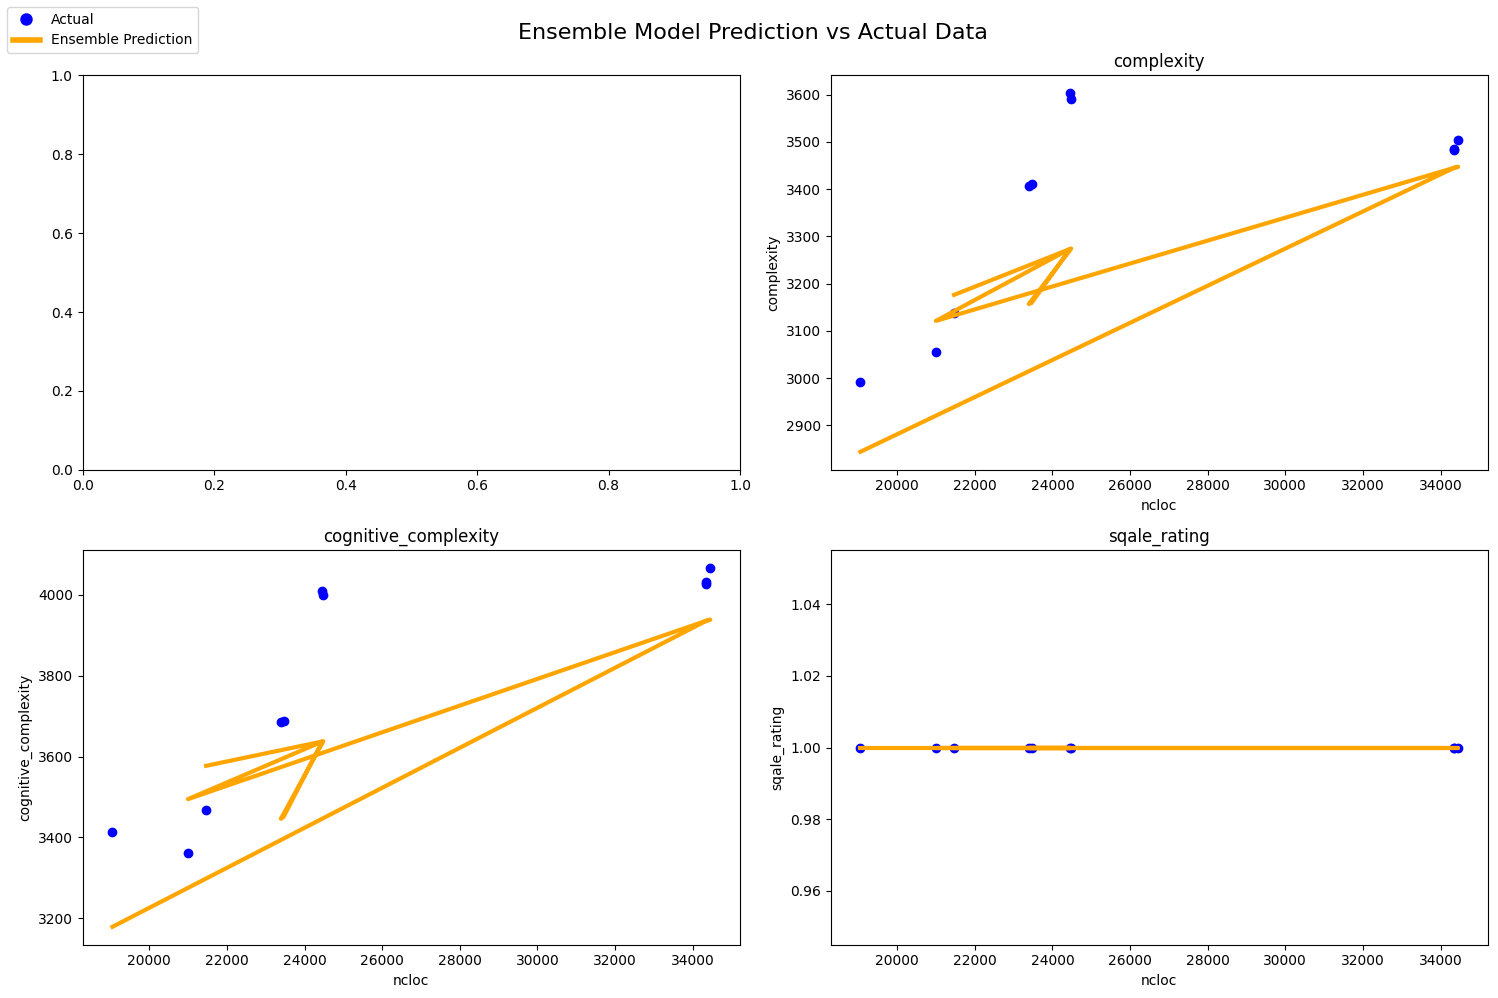

In [48]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the Ensemble model
models = {
    'Ensemble': VotingRegressor([('SVM', SVR(kernel='linear')), ('Decision Tree', DecisionTreeRegressor(random_state=42))])
}

# Create custom legend handles and labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], color='orange', lw=4, label='Ensemble Prediction')]

# Loop over each target variable
for i, target in enumerate(target_columns):
    y = df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Evaluate the Ensemble model
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {'MSE': mse, 'R-squared': r2}

        # Scatter plot of actual data points
        scatter = axs[(i+1)//2, (i+1)%2].scatter(X_test, y_test, color='blue')

        # Regression line
        line = axs[(i+1)//2, (i+1)%2].plot(X_test, predictions, linewidth=3, color='orange')

        axs[(i+1)//2, (i+1)%2].set_title(f'{target}')
        axs[(i+1)//2, (i+1)%2].set_xlabel('ncloc')
        axs[(i+1)//2, (i+1)%2].set_ylabel(target)

    # Display results
    for name, metrics in results.items():
        print(f"{name} Model for {target}:")
        print(f"Mean Squared Error: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print()

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper left')

# Set a general title for the figure
fig.suptitle('Ensemble Model Prediction vs Actual Data', fontsize=16)

plt.tight_layout()
plt.show()